In [1]:
import numpy as np
import pandas as pd
import matplotlib as pl
import math
import random


#  Data split


In [2]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [3]:
data=pd.read_csv("./Glass.txt",sep="\t",header=None )
del data[11]

data.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0,2,0,1,0,0,1,2,0,0,0
1,0,1,0,1,0,0,1,1,0,0,0
2,0,0,0,1,1,0,1,1,0,0,0
3,0,1,0,1,0,0,1,1,0,0,0
4,0,1,0,1,0,0,1,1,0,0,0


# divide the data into two categories

In [4]:
train_data , test_data = train_test_split(data , test_size=0.3)




#  One-Hot representation

In [6]:
X_train=train_data.iloc[:,0:10].T
Y_train=pd.get_dummies(train_data.iloc[:,-1], prefix='y').T

X_test=test_data.iloc[:,0:10].T
Y_test=pd.get_dummies(test_data.iloc[:,-1], prefix='y').T

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)



(10, 150)
(6, 150)
(10, 64)
(6, 64)


## Activation Function

In [7]:
def Relu(x):
    return np.maximum(x,0)

def SoftMax(x):
    expx=np.exp(x)
    return expx/np.sum(expx,axis=0)
    

In [8]:
def derivative_Relu(u):
    return np.array(u>0,dtype=np.float16)


## initialize Parameters 
#####   In this function,we have three paramerters that  n_x is the number of neurons in the input layer and n_h is the number of neurons  in the hidden layer , at the end n_y is the number of neurons  in the output layer

In [9]:
def initialize_parameters(n_x,n_h,n_y):
    w1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    
    w2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    parameters={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2
    }
    return parameters

# Forward Propagation

In [10]:
def forward_propagation(x,parameters):
    
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    z1=np.dot(w1,x) + b1
    a1=Relu(z1)
    
    z2=np.dot(w2,a1) + b2
    a2=SoftMax(z2)
    
    forward_cache={
        "z1":z1,
        "a1":a1,
        "z2":z2,
        "a2":a2
    }
    
    return forward_cache

    

# cross_entropy 

In [11]:
def cost_function(a2,y):
    m=y.shape[1]
    cost=-(1/m)*np.sum(y*np.log(a2))
    
    return cost      

# Backpropagation 

In [12]:
def backward_prop(x,y,parameters,forward_cache):
    
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']
    
    a1=forward_cache['a1']
    a2=forward_cache['a2']
    
    m=x.shape[1]
    
    dz2=(a2-y)
    dw2=(1/m)*np.dot(dz2,a1.T)
    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
    
    dz1=(1/m)*np.dot(w2.T ,dz2)*derivative_Relu(a1)
    dw1=(1/m)*np.dot(dz1,x.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
    
    gradients={
        "dw1":dw1,
        "db1":db1,
        "dw2":dw2,
        "db2":db2
        
    }
    
    
    return gradients

# update Parameters

In [13]:
def update_parameters(parameters,gradients,Learning_rate):
    
    w1=parameters['w1']
    b1=parameters['b1']
    w2=parameters['w2']
    b2=parameters['b2']    
    
    dw1=gradients['dw1']
    db1=gradients['db1']
    dw2=gradients['dw2']
    db2=gradients['db2']
    
    w1= w1 - Learning_rate*dw1
    b1= b1 - Learning_rate*db1
    w2= w2 - Learning_rate*dw2
    b2= b2 - Learning_rate*db2
    
    parameters={
        "w1":w1,
        "b1":b1,
        "w2":w2,
        "b2":b2
    }
    return parameters

# Start Learning 

In [93]:
n_x=X_train.shape[0]
n_y=Y_train.shape[0]
n_h=11
Learning_rate=0.01
parameters=initialize_parameters(n_x,n_h,n_y) 
for i in range(5000):     
    forward_chache=forward_propagation(np.array(X_train),parameters)  
    cost=cost_function(forward_chache['a2'],Y_train)    
    gradients=backward_prop(np.array(X_train),np.array(Y_train),parameters,forward_chache)  
    parameters=update_parameters(parameters,gradients,Learning_rate)
    
    




##  Accuracy

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

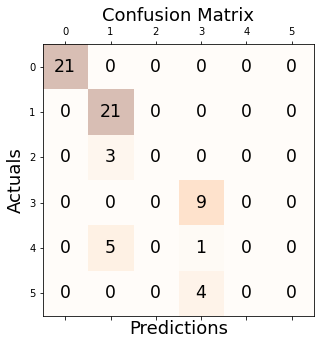

In [94]:
forward_ch=forward_propagation(X_test,parameters)
y_pre=np.argmax(forward_ch['a2'],0)
y_true=np.argmax(np.array(Y_test),0)
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pre)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):    
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [95]:
print(accuracy_score(y_true=y_true, y_pred=y_pre)*100)

79.6875


In [96]:
print(precision_score(y_true,y_pre,average=None))

[1.         0.72413793 0.         0.64285714 0.         0.        ]


C:\Users\navaki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
print(recall_score(y_true,y_pre,average=None))

[1. 1. 0. 1. 0. 0.]


In [98]:
print(f1_score(y_true,y_pre,average=None))

[1.        0.84      0.        0.7826087 0.        0.       ]
